In [4]:
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd


In [6]:
ses = "../new/ornekler/wow/6982fc2a_nohash_0.wav"
x,sr = librosa.load(ses)
# x -> ses zaman serisi
# sr -> ses frekansı(Hz)

In [7]:
ipd.Audio(ses)
ipd.Audio(x,rate=sr)  #Bu şekilde de oynatılabiliyor.


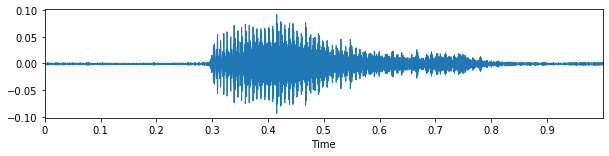

In [8]:
plt.figure(figsize=(10,2))
librosa.display.waveplot(x,sr=sr)


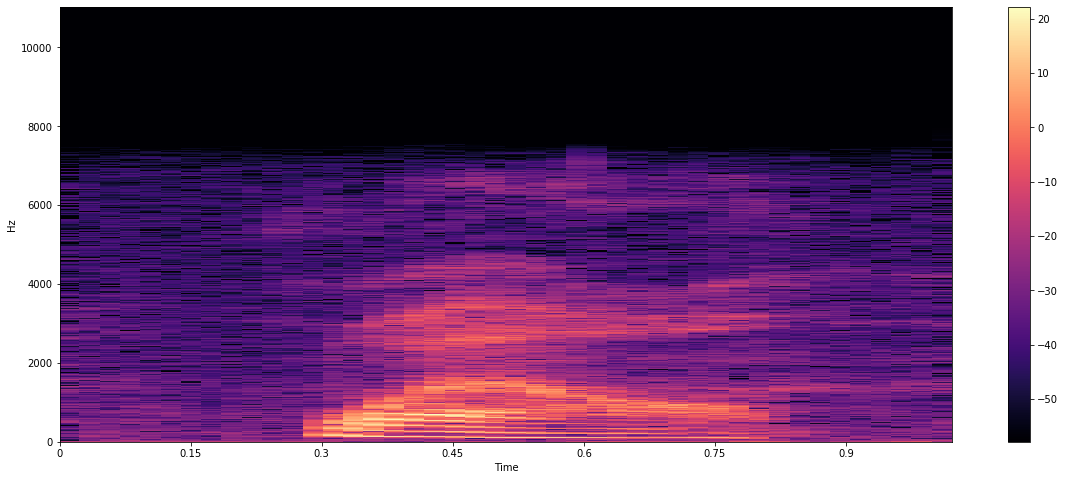

In [9]:
X=librosa.stft(x) #stft -> Short-time Fourier transform
Xdb=librosa.amplitude_to_db(abs(X)) #Genlikten Desibel değerine
plt.figure(figsize=(20,8))
librosa.display.specshow(Xdb,sr=sr,x_axis="time",y_axis="hz")
plt.colorbar()

2730


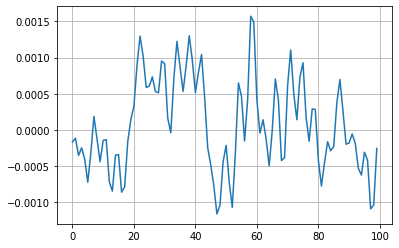

In [12]:
#Zero crossing rate - bir sinyalin sıfır çizgisinden geçişi yani işaret değişiminin oranıdır.
zero_crossing=librosa.zero_crossings(x)
print(sum(zero_crossing)) #Toplam sıfır geçişi sayısı
 #1908
plt.plot(x[5000:5100])
plt.grid()

(1, 44)


Text(0, 0.5, 'Hz')

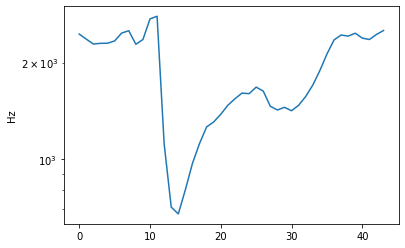

In [13]:
# Spectral Centroid -  Spektrumun kütle merkezinin nerede olduğunu gösterir.
spec_cent=librosa.feature.spectral_centroid(x)
print(spec_cent.shape)
#(1, 216)
plt.semilogy(spec_cent.T)
plt.ylabel("Hz")


(1, 44)


Text(0, 0.5, 'Hz')

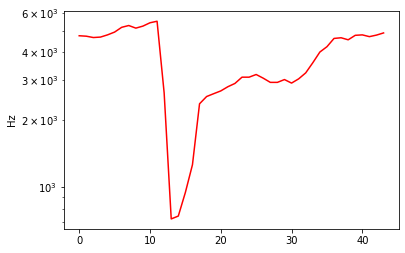

In [14]:
#Spectral Rolloff - Sinyal şeklinin ölçüsü. Toplam spektral enerjisinin belli bir yüzdesini temsil eder.
spec_roll=librosa.feature.spectral_rolloff(x,sr=sr)
print(spec_roll.shape)
#(1, 216)
plt.semilogy(spec_roll.T,"r")
plt.ylabel("Hz")


(12, 44)


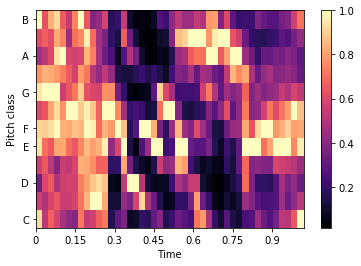

In [15]:
#Chroma Frekansı - Spektrum müzikal oktavının 12 farklı yarı tonunu(chroma) temsil eden 12 parçanın belirtildiği ses için güçlü bir sunumudur.
chroma=librosa.feature.chroma_stft(x,sr=sr)
print(chroma.shape)
  #(12, 216)
librosa.display.specshow(chroma,y_axis="chroma",x_axis="time")
plt.colorbar()